# 6. 학습 관련 기술들
>
    >신경망 학습의 핵심 개념들을 만나보자  
    이번 장에서는 신경망 학습의 핵심 개념들을 보고자 한다.  
        > - 가중치 매개변수의 최적값을 탐색하는 최적화 방법   
        > - 가중치 매개변수 초깃값  
        > - 하이퍼파라미터 설정방법  

>모두 신경망 학습에서 중요한 주제이다.  
오버피팅의 대응책인 가중치 감소와 드롭아웃등의 정규화도 간단히 설명하고자 한다.  
마지막으로 최근 많이 사용되는 배치 정규화도 짧게 알아볼것이다.

    
    

## 6-1 매개변수 갱신
> 신경망 학습의 목적은 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것이다.  
이는 곧 매개변수의 최적값을 찾는 문제이며, 이러한 문제를 푸는 것을 최적화 라고한다.  
안타깝게도 이것은 굉장히 어려운 문제이다.  
매개변수의 공간은 매우 넓고 복잡해서 최적의 솔루션은 쉽게 찾을수 있는 것이 아니다.  
수식을 풀어 순식간에 구할 수도 없는데 거기에 더해  
심층 신경망에서는 매개변수의 수가 엄청나게 증가하여 사태는 심각해진다.  

> 우리는 지금까지 최적의 매개변수 값을 찾는 단서로 매개변수의 미분을 이용했다.
매개변수의 기울기를 구해 기울어진 방향으로 점점 최적값에 다가갔다.
이것이 확률적 경사 하강법이란 단순한 방법이다.  
이는 매개변수 공간을 무작정 찾는 것보다 똑똑한 방법이다. 
SGD는 단순하지만 문제에 따라 SDG보다 똑똑한 방법도 있다.
이번 장에서는 SDG의 장단점에 대하여 알아본 후 다른 기법을 소개하려 한다.

### 6-1.1 모험가 이야기

> 본론으로 들어가기 전에, 최적화를 해야 하는 우리의 상황을 모험가 이야기에 비유해보자.(내용은 책확인)  
최적 매개변수를 탐색하는 우리도 이 모험가와 같이 어둠의 세계를 탐험하게 된다.  
광대하고 복잡한 지형을 지도도 없이 눈을 가린채로 깊은 곳을 찾지 않으면 안된다. 척 봐도 어려운 문제임이 느껴지지 않나?  
이 어려운 상황에서 가장 중요한 단서는 땅의 기울기 이다. 
발바닥으로 아마 전해지럿이다. 그래서 지금 서 있는 장소에엇 가장 크게 기울어진 방얗응로 가자는 것이 SGD의 전략이다.  
이 일을 반복하면 언젠가 도달 할 수 있을지도 모른다. 적어도 용감한 모험가에게는 말이다.

### 6-1.2 확률적 경사 하강법(SGD)

> 최적화 문제의 어려움을 되새기고자 먼저 복습을 해보자. SGD는 수식으로 다음과 같이 나타낼 수 있다.(식6.1)  
여기에서 W는 갱신할 매개변수고 dl/dw은 W에 대한 손실함수의 기울기이다. 에타는 학습률을 의미하는데 실재로는
0.01 이나 0.001과 같은 값을 미리 정해서 사용한다. 또 <-- 는 우변의 값으로 좌변의 값으로 좌변의 값을 갱신한다는 뜻이다.
식에서 보듯 기울어진 방향으로 일정 거리만 가겠다는 단순한 방법이다. 이를 파이썬 클래스로 구현해보자.



In [1]:
class SGD:
    def __init__(self,lr=0.01):
        self.lr = lr
    def update(self,params,grads):
        for key in params.keys():
            params[key] -= self.lr*grads[key];

> 이 학습률을 인스턴스 변수로 유지한다.  
update(parmas, grads)메서드는 SGD과정에서 반복해서 불립니다.  
인수인 parmas와 grads는 딕셔너리 변수입니다.  
각각 매개변수와 기울기를 저장하고 있다.
SGD클래스를 사용하면 신경망 매개변수의 진행을 다음과 같이 진행할 수 있습니다.

In [2]:
network = TwoLayerNet(...)
optimizer = SGD()

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...)
    grads = network.gradient(x_batch,t_batch)
    params = network.params
    optimizer.update(params,grads)
    ...
    
    

NameError: name 'TwoLayerNet' is not defined

> optimizer는 최적화를 행하는 자 라는 뜻이다.  
이 코드에서는 SGD가 그 역활을 합니다.
매개변수 갱신은 optimizer가 책임지고 수행하니 우리는 매개변수와 기울기 정보만 넘겨주면 된다.

> 이처럼 최적화를 담당하는 클래스를 분리해 구현하면 기능을 모듈화하기 좋습니다.  
예를 들어 곧이어 소개할 모멘텀이라는 최적화 기법 역시 업에이라는 공통의 메서드를 갖도록 구현한다.
그때 optimizier = SGD()을  
optimizer = Momentum()으로만 변경하면 변경하면 SGD가 모멘텀으로 바뀌는 것이죠.


### 6-1.3 SGD의 단점
>
    > SGD는 단순하고 구현도 쉽지만, 문제에 따라서는 비효율적일 때가 있습니다.  
    이번 절에서는 SGD의 단점을 알아보고자 다음 함수의 최솟값을 구하는 문제를 생각해보겠습니다.[식6.2]
    이 함수는 왼쪽과 같이 밥그릇을 xcnr 방향으로 늘인 듯한 모습이고,  
    실제로 그 등고선은 오른쪽과 같이 x축 방향으로 늘인 타원으로 되어 있습니다.  
>    
    > 식[6.2] 함수의 기울기를 그려보면 다음과 같이 된다. 이 기울기는 y축 방향으로 크고 x축방향으로 작다는 것이 특징이다.
    말하자면 y축 방향은 가파른데 x축 방향은 완만한 것이다. 
    또 여기서 주의할 점으로는 최솟값이 되는 장소는 (x,y) = (0,0)이지만
    그림이 보여주는 기울기 대부부은 0,0을 가리키지 않는다는 것이다.
>
    > 이제 적용해보자.탐색을 시작하는 장소는 (x,y) =(-7.0,2.0) 으로 하겠다.
    결과는 그림 6-3을 확인하자.  
    심하게 굽이진 움직임을 보여준다. 상당히 비효율적인 움직임이라고 할 수있다.
    SGD의 단점은 비등방성 함수에서는 탐색경로가 비효율적이라는 것이다.
    이럴 때는 SGD외에 다른 영리한 묘안이 필요해진다.

>
    > 이제부터 SGD의 이러한 단점을 개선해주는 모멘텀,AdaGrad,Adam이라는 세 방법을 소개 할 것이다.
    

### 6-1.4 모멘텀
>
    > 모멘텀은 운동량을 뜻하는 단어로, 물리와 관계가 있습니다.  
    모멘텀 기법은 수식으로 다음과 같이 쓸 수 있습니다.[식 6.3,4]  
    여기서 v라는 변수가 새로 생기는데, 이는 물리에서 말하는 속도에 해당한다.  
    식 6.3은 기울기 방향으로 힘을 받아 물체가 가속된다는 물리법칙을 나타낸다.  
    av항은 물체가 아무런 힘을 받지 않을때 서서히 하강시키는 역할을 한다. 지면 마찰이나 공기 저항에 해당하는 것이다.  
    알파는 중력가속도와 비슷한 0.9라고 한다.


In [ ]:
import numpy as np
class Momentum:
    def __init__(self,lr=0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    def update(self,params,grads):
        if self.v is None:
            self.v = {}
            for key,val in params.items():
                self.v[key] = np.zeros_list(val)

        for key in params.keys():
            self.v[key] = self.momentum*self.v[key]- self.lr*grads[key]
            params[key] +=self.v[key]

>
    > 인스턴스 변수 v가 물체의 속도입니다. v는 초기화 때는 아무 값도 담지 않고,  
    대신 update()가 처음 호출될 때 매개변수와 같은 구조의 데이터를 딕셔너리 변수로 저장합니다.  
    나머지 부분은 식 6.3과 6.4를 코드로 옮긴 것이다.

>
    > 결과를 보면 공이 그릇 바닥을 구르듯 움직인다.
    SGD와 비교하면 지그재그가 좀 덜한 것을 확인할 수 있다.  
    x축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속하기 때문이다.  
    거꾸로 y축의 힘은 크지만 위아래로 번갈아 받아서 상충하여 y축 방향의 속도는 안정적이지 않습니다.  
    전체적으로 sGD보다 x축 방향으로 바르게 다가가 지그재그 움직임이 줄어든다.

### 6-1.5 AdaGrad
>
    >신경망 학습에서는 학습률이 중요하다.
    값이 너무 작으면 학습 시간이 길어지고 값이 너무 크면 발산하여 제대로 이뤄지지 않는다.

>
    > 이 학습률을 정하는 효과적 기술로 학습률 감소가 있다. 이는 학습을 진행하면서 학습률을 점차 줄여가는 방법이다.  
    처음에는 크게 학습하다가 조금씩 작게 학습한다는 얘기로 실제 신경망 학습에 자주 쓰인다.
    학습률을 서서히 낮추는 가장 간단한 방법은 매개변수 '전체'의 학습률 값을 일괄적으로 낮추는 것이다.
    이를 더욱 발전 시킨 것이 AdaGrad이다. 이것은 각각의 매개변수에 맞춤형 값을 만들어 준다.

>
    > AdaGrad는 개별 매개변수에 적응적으로 학습률을 조정하면서 학습을 진행합니다.  
    갱신 방법은 수식으로 다음과 같이 나타난다.[식 6.5,6]  
    여기서 h라는 변수가 새로 등장하는데, 가중치에 대한 손실함수의 기울기의 제곱을 의미한다.  
    그리고 나중에 가중치에는 루트에 넣은 h를 나누어 주는 연산을 진행하여 오차가 작을수록 큰 학습률을  
    가지게 하는 것이다. 이제 구현해보자.

In [ ]:
class AdaGrad:
    def __init(self,lr = 0.01):
        self.lr = lr
        self.h = None
    def update(self,params, grads):
        if self.h is None:
            self.h = {}
            for key,value in params.items():
                self.h[key] = np.zeros_like(value)
        
        for key in params.keys():
            self.h[key] +=grads[key]*grads[key]
            params[key] -= self.lr * grads[key]/((np.sqrt(self.h[key]) + 1e-7))

>
    > 그림[6-6]을 보면 최솟값을 향해 효율적으로 움직이는 것을 알 수 있다.
    y축 방향은 기울기가 커서 빠르게 줄어들지만 그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정 된다.
    그래서 y축방향으로 갱신 강돡 빠르게 약해지고, 지그재그 움직임이 줄어들게 되는 것이다.

### 6-1.6 Adam
>
    >  모멘텀은 공이 그릇 바닥을 구르는 듯한 움직임을 보였습니다.  
    AdaGrad는 매개변수의 원소마다 적응적으로 갱신 정도를 조정했습니다.  
    그럼 혹시 이 두기법을 융합하면 어떻게 될까?
    이런 생각에서 출발한 것이 바로 Adam이다.

>
    >Adam은 2015년 제안된 새로운 방법이다.  
    그 이론은 다소 복잡하지만 직관적으로는 모멘텀과 AdaGrad를 융합한 듯한 방법이다.  
    이 두 방법의 이점을 조합했다면 매개변수 공간을 효율적으로 탐색해줄것을 기대해도 좋을 것이다.  
    또 하이퍼 파라미터의 편향 보정이 진행된다는 점도 특징이다.
    그럼 구현해보자.

In [ ]:

class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)


### 6-1.7 어느 갱신 방법을 이용할 것인가?
>
    > 지금까지 4개의 방벙을 사용해 보았다. 그림만 보아서는 AdaGrad가 가장 효율적이어 보이지만  
    이는 하이퍼파라미터의 설정과 어떤 함수에 적용했냐에 따라 그 결과 값이 매우 달라진다.  
    또한 각 학습법 별로 적합하고 서툰 문제들이 따로 존재하기에 다양한 적용이 중요하다.
    현재로서는 SGD와 Adam이 가장 많이 사용되는 추세라고 한다.

### 6-1.8 MNIST 데이터셋으로 본 갱신 방법 비교
>
    > 손글씨 숫자 인식을 대상으로 지금까지 설명한 네 기법을 사용하여 학습 진도가 얼마나 다른지 확인해보았다.  
    본 실험은 각 층이 100개의 뉴런으로 구성된 5층 신경망에서 ReLU를 활성화 함수로 사용해 측정했다. 
    결과를 보면 SGD의 학습 진돡 가장 느리고 나머지 세기법의 진도는 비슷해 보인다.  
    잘보면 AdaGrad가 조금 더 빠른것이 것으로 보이기도 하다.
    이 실험에서 주의할 점은 하이퍼파라미터인 학습률과 신경망의 구조에 따라 결과가 달라진다는 것이다.  
    다만 일반적으로 SGD보다 다른 세 기법이 빠르게 학습하고 때로는 최종 정확도도 높게 나타난다.

## 6-2 가중치의 초깃값
>
    > 신경망 학습에서 특히 중요한 것이 가중치의 초깃값이다.  
    이번 절에서는 권장 초깃값에 대해서 설명하고 실험을 통해 실제로 신경망 학습이 신속하게 이뤄지는 모습을 확인해보자.

### 6-2.1 초깃값을 0으로 하면?
>
    > 이제부터 오버피팅을 억제해 범용 성능을 높이는 테크닉인 가중치 감소 기법을 소개하려 한다.  
    가중치 감소는 간단히 말하자면 가중치 매개변수의 값이 작아지도록 학습하는 방법이다.  
    가중치를 작게 만들고 싶으면 초깃값도 최대한 작은 값에서 시작하는 것이 정공법이다.  
    사실 지금 까지 가중치의 초깃값은 0.01 np.random.randn(10,100) 처럼 정규분포에서 생성되는 값을 
    0.01배 한 작은 값을 사용하였다.

>
    > 그렇다면 가중치의 초깃값을 모두 0으로 설정하면 어덯게 될까?  
    답부터 이야기하자면, 이는 나쁜아이디어 이다.  
    왜 0으로 하면 안되는 것일까?  
    그 이유는 바로 오차 역전파법에서 모든 가중치의  값이 똑같이 갱신되기 때문이다.
    즉, 가중치를 여러지고 한 의미가 사진다는 것이다.

### 6-2.2 은닉층의 활성화값 분포
>
    >은닉층의 활성화 함수의 출력데이터의 분포를 관찰하면 중요한 정보를 업을 수 있다.  
    구체적으로는 활성화 함수로 시그모이를 사용하는 5층 신경망에서 무작위로 생성하 입력데이터를 흘리며 각 층의 활성화 값을 히스토 그램으로 그려보자.
    


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.random.randn(1000,100) # 100개의 데이터
node_num = 100          #각 은닉츠으이 노드 수
hidden_layer_size = 5   # 은닉층이 5개
activations = {}        # 이곳에 활성화 결과를 입력

for i in range(hidden_layer_size):
    if i!=0:
        x= activations[i-1]
    
    w = np.random.randn(node_num,node_num)*1
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z
    

현재는 표준편차가 1인 정규분포를 이용했는데,  
이 분포된 정도를 바꿔가며 활성화 값이 어떻게 변화하는지를 관찰 할 것이다.

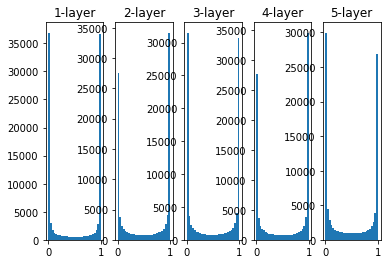

In [ ]:
#히스토그램 그리기
for i,a in activations.items():
    plt.subplot(1,len(activations),i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(),30,range=(0,1))
plt.show()
    

다음 그림은 정규분포가 1인 데이터를 가지고 진행했을 때의 활성화값 분포이다.  
각 층의 활성화 값들이 0 과 1에 치우쳐져 분포되고 있는 모습을 확인할 수 있다.
여기에서 사용한 시그모이드 함수는 그 출력이 0에 가까워지자 그 미분은 0에 다가갑니다.
그래서 데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다가 사라진다.  
이것이 기울기 소실이라 알려진 문제이다.
이번에는 가중치의 표준편차를 0.01로 바꿔 같은 실험을 반족해보겠다.

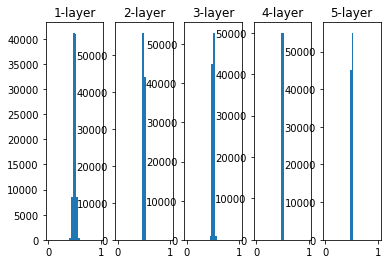

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.random.randn(1000,100) # 100개의 데이터
node_num = 100          #각 은닉츠으이 노드 수
hidden_layer_size = 5   # 은닉층이 5개
activations = {}        # 이곳에 활성화 결과를 입력

for i in range(hidden_layer_size):
    if i!=0:
        x= activations[i-1]
    
    w = np.random.randn(node_num,node_num)*0.01
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z
    
#히스토그램 그리기
for i,a in activations.items():
    plt.subplot(1,len(activations),i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(),30,range=(0,1))
plt.show()

번에는 0.5 부근에 집중되어있다. 앞의 예처럼 0 과 1로 치우치지 않았으니  
기우릭 소실 문제는 일어나지 않는다. 하지만 활성화 값들이 추어쳤다는 것은 큰 문제가 있다.  
무슨 이야기냐 하면, 이상황에서는 다수의 뉴런이 거의 같은 값을 출력하고 있으니 뉴런을 여러개 둔 의미가 없어진 다는 뜻이다.
예를 들어 100개가 거의 같은 값을 출력한다면 뉴런 1개짜리와 별반 다를게 없는 것이다.  

이어서 사비에르 글로로트와 요수아 벤지오의 논문에서 궍아하는 가중치 초깃값인 일명 Xavier 초깃값을 써보겠다.
현재 Xavier 초깃값은 일반적인 딥러닝 프레임워크들이 표준적으로 이용하고 있다.  

이 논문은 각 층의 활성화값들을 광법위하게 분포시킬 목적으로 가중치의 적절한 분포를 찾고자 했다. 
그리고 앞 계층의 노드가 n개 라면 표준편차가 1/sqrt(n) 인 분포를 사용하면 된다는 결론을 이끌었다.

이것을 사용하면 앞으ㅔ 노드가 많을 수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼진다.

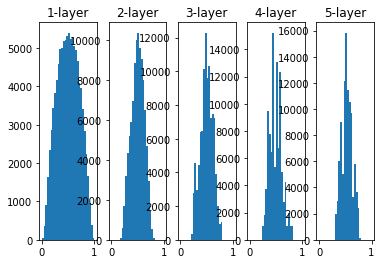

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.random.randn(1000,100) # 100개의 데이터
node_num = 100          #각 은닉츠으이 노드 수
hidden_layer_size = 5   # 은닉층이 5개
activations = {}        # 이곳에 활성화 결과를 입력

for i in range(hidden_layer_size):
    if i!=0:
        x= activations[i-1]
    
    w = np.random.randn(node_num,node_num) /np.sqrt(node_num)
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z
    
#히스토그램 그리기
for i,a in activations.items():
    plt.subplot(1,len(activations),i+1)
    plt.title(str(i+1)+"-layer")
    plt.hist(a.flatten(),30,range=(0,1))
plt.show()

이 결과를 보면 층이 깊어지면서 형태가 다소 일그러지지만,  
앞에서 본 방식보다는 확실히 넓게 분포됨을 알 수 있다.
각 층에 흐르는 데이터는 적당히 퍼져 있으므로, 시그모이드 함수의 표현력도 제한받지 않고  
학습이 효율적으로 이뤄질것으로 기대된다.

### 6-2.3 ReLU를 사용할 때의 가중치 초깃값

>
    > Xavier 초깃값은 활성화 함수가 선형ㅈ인 것을 전제로 이끈 결과이다.  
    sigmoid와 tanh함수는 좌우 대칭이라 중앙 부근이 선형인 함수로 볼 수 있다.
    그래서 Xavier 초깃값이 적당합니다.  
    반면 ReLU를 이요할 때는 ReLU에 특화된 초깃값을 이용하길 권장한다.  
    이 특화된 초깃값을 찾아낸 카이밍 히의 이름을 따 He초깃값이라고 한다.
    He 초깃값은 앞 계층의 노드가 n개일때 표준 편차가 sqrt(2/n)인 정규분포이다.
    ReLU는 음의 영역이 0이라서 더 넓게 분포 시키기 위해 2배의 계수가 필요하다고 해석할 수 있을것이다.
    그럼 ReLU를 이요한 경우의 활성화값 분포를 함께 보자.


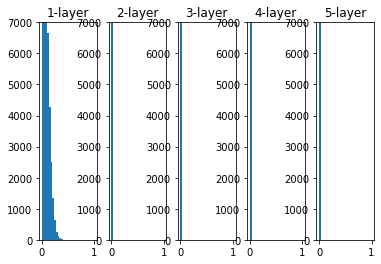

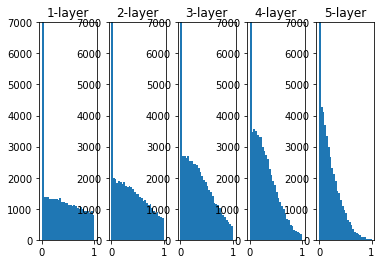

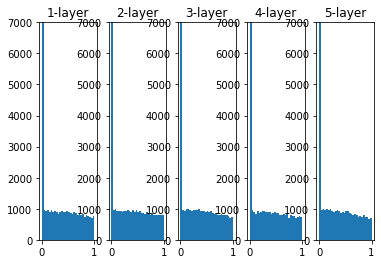

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



def ReLU(x):
    return np.maximum(0,x) # 둘개의 입력 값 중 큰 값을 반환하는 함수
    
x = np.random.randn(1000,100) # 100개의 데이터
node_num = 100          #각 은닉츠으이 노드 수
hidden_layer_size = 5   # 은닉층이 5개
activations = {}        # 이곳에 활성화 결과를 입력

s = [0.01,1/np.sqrt(node_num),np.sqrt(2) /np.sqrt(node_num)]
for p in s:
    activations = {}
    x = np.random.randn(1000,100)
    for i in range(hidden_layer_size):
        if i!=0:
            x= activations[i-1]
        
        w = np.random.randn(node_num,node_num)*p
        a = np.dot(x,w)
        z = ReLU(a)
        activations[i] = z
        
    #히스토그램 그리기
    for i,a in activations.items():
        plt.subplot(1,len(activations),i+1)
        plt.title(str(i+1)+"-layer")
        plt.hist(a.flatten(),30,range=(0,1))
        plt.ylim(0,7000)
    plt.show()

결과를 보면 std = 0.01 일 때의 각 층의 활성화 값들은 아주 작은 값들을 가진다.  
신경망에 아주 작은 데이터가 흐른다는 것은 연전파 때 가중치의 기울기 역시 작아진다는 뜻이다.  
이는 중대한 문제이며 실제로도 학습이 거의 이뤄지지 않을 것이다.  

이어서 Xavier 초깃값 결과를 보면 이쪽은 층이 깊어지면서 치우침이 조금씩 커집니다.  
실제로 층이 깊어지면 활성화 값들의 치우침도 커지고, 학습할 때 기울기 소실 문제도 발생시킨다.  

마지막으로 He초기값은 모든 층에서 균일하게 분포되어있다. 층이 깊어져도 분포가 균일하게 유지되기에 역전파때도 적절한 값이 나오길 기대할 수 있다.  
이상 실험 결과를 바탕으로, 활성화 함수로 ReLU를 사용할 때는 He 초깃값을
sigmoid나 tanh등의 s자 모양 곡선일 때는 Xavier 초깃값을 사용할 것이다.

## 6.3 배치 정규화
>
    > 앞 절에서는 각 층의 활성화값 분포를 관찰해보며, 가중치의 초깃값을 적절히 설정하면  
    각층의 활성화 값 분포가 적당히 퍼지면서 학습이 원활하게 수행됨을 알았다. 
    그렇다면 각 층이 활성화를 적당히 퍼뜨리도록 강제해보면 어떨까?  
    실은 배치 정규화가 그런 아이디어에서 출발한 방법이다.

### 6-3.1 배치 정규화 알고리즘
>
    > 배치 정규화는 2015년에 제안된 방법이다.  
    배치 정규화는 아직 세상에 나온지 얼마 안된 기법임에도 많은 연구자와 기술자가 즐겨 사용하고 있다.  
    실제로 기계학습 콘테스트의 결과를 보면 이 배치 정규화를 사용하여 뛰어난 결과를 달성한 예가 많다.  
    배치 정규화가 주목 받는 이유는 다음과 같다.
>
    >
        >   - 이유들  
            - 학습을 빨리 진행할 수 있다.  
            - 초깃값에 크게 의존하지 않는다.  
            - 오버피팅을 억제한다.(드롭아웃 필요성 감소)

>
    > 배치정규화의 기본 아이디어는 앞에서 말했듯이 각 층에서의 활성화값이 적당히 분포되도록 조정하는 것이다.  
    그래서 그림[6-16]과 같이 데이터 분포를 정규화하는 '배치 정규화 계층'을 신경망에 삽입할 것이다.  

>
    > 배치 정규화는 그 이름과 같이 학습시 미니배치를 단위로 정규화 한다.  
    구체적으로는 데이터 분포가 평균이 0, 분산이 1이 되도록 정규화 한다. 수식으로는 다음과 같다.[식 6.7]

>
    > 여기에는 미치배치 B = {x1,x2,...,xm}이라는 m개의 입력 데이터의 집합에 대한 평균과 분산을 구한다.  
    평균이 0, 분산이 1이 되게 적절히 정규화 한다. 그리고 엡실론 기호는 작은 값으로 0으로 나누는 사태를 방지하는 역활을 한다.  
    단순히 미니배치 입력 데이터를 변환하는 일을 하는 것이 첫번째 일이다.  
    이 처리를 활성화 함수의 앞 혹은 뒤에 삽입 함으로써 데이터 분포가 덜 치우치게 할 수 있다.

>
    > 또, 배치 정규화 계층마다 이 정규화된 데이터에 고유한 확대와 이동 변환을 수행한다. 수식으로는 다음과 같다.
    식[6.8]을 확인하면 이식에서 감마는 확대를 베타는 이동을 담당한다.  
    두 값은 처음에는 감마는 1 베타는 0부터 시작하고 학습하면서 적합한 값으로 조정해 나간다.

>
    > 이상이 배치 정규화의 알고리즘이다. 이 알고리즘이 신경망에서 순전파에 적용된다. 이를 5장에서 설명한 계산 그래프로는 그림 [6-17]처럼 그릴 수 있다.
    

### 6-3.2 배치 정규화의 효과
>
    > 그럼 배치 정규화 계층을 사용한 실험을 해보자. 우선은 MNIST 데이터셋을 사용하여   
     배치 정규화 계층을 사용할때와 사용하지 않았을때  학습 진도가 어떻게 달리는지 알아보자. (그림 6-19)
     확인해보면 초깃값 표준편차에 별다른 영향을 받지 않고 꾸준히 좋은 학습률을 보여주고 있다.
>
    > 이처럼 실제로 학습속도가 가중치 초깃값에 크게 의존 하지 않아도 된다는 것이 가장 큰 장점이라고 할 수있다.

## 6-4 바른 학습을 위해
>
    > 기계학습에서는 오버피팅이 문제가 되는 일이 많다.  
    오버피팅이란 신경망이 훈련 데이터에만 지나치게 적응되어 그외의 데이터에는 제대로 대응하지 못하는 상태를 말한다.  
    기계 학습은 범용 성응을 지향한다.  
    훈련 데이터에 포함되지 않는 아직 보지 못한 데이터가 주어져도 바르게 식별해내는 모델이 바람직 하다.  
    복잡하고 표현력이 높은 모델을 만들 수는 있지만 그만큼 오버피팅을 억제하는 기술이 중요하다.  

### 6-4.1 오버피팅
>
    > 오버피팅은 주로 다음 두 경우에서 발생한다.  
        > -매개변수가 많고 표현력이 높은 모델  
        - 훈련 데이터가 적음  
>
    > 이번 절에서는 이 두 요건을 일부로 충족하여 오버피팅을 일으켜보겠다.  
    그러기 위해 본래 6만개 였던 데이터셋의 훈련 데이터 중 300개만 사용하고,  
    7층 네트워크를 사용해 네트워크의 복잡성을 높이겠다.  
    각 층의 뉴런은 100개 활성화함수는 ReLU를 사용한다.

>
    >결과를 보자.  
    훈련 데이터를 사용하여 측정한 정확도는 100에폭을 지날 무렵 이미 거의 100%이다.  
    그러나 시험 데이터에 대해서는 큰 차이를 보인다. 평균적으로 60~70 사이의 정확도를 보이고 있다.

### 6-4.2 가중치 감소
>
    >오버피팅 억제용으로 예로부터 많이 이용해온 방법중 가중치 감소라는 것이 있다.  
    이는 학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 페널티를 부과하여 오버피팅을 억제하는 방법이다.  
    원래 오버피팅은 가중치 매개변수의 값이 커서 발생하는 경우가 많기 때문이다.

>
    > 복습해보자. 신경망 학습의 목적은 손실함수의 값을 줄이는 것이다.  
    이때 예를 들어 가중치의 제곱 노드를 손실 함수에 더한다.  
    그러면 가중치가 커지는 것을 방지 할 수 있다.
    가중치를 W라 하면 ㅣ2 노름에 따른 가중치 감소는 1/2람다W^2이 되고 이 값을 손실 함수에 더한다.  
    여기서 람다는 정규화의 세기를 조정하는 하이퍼파라미터이다.  
    이값을 크게 설정할 수록 큰 가중치에 대한 패널티가 커진다.  
>
    > 구현뒤 결과를 확인해보면  
    학습 데이터에 대한  정확도는 100퍼에서 90퍼로 감소하였고  
    테스트 데이터에 대한 정확도는70~80퍼로 증가하였다.

### 6-4.3 드롭아웃
>
    > 앞 절에서는 오버피팅을 억제하는 방식응로 손실함수에 가중치의 L2노름을 더한 가중치 감소방법을 설명하였다.  
    가중치 감소는 간단하게 구현할 수 있고 어느 정도 지나친 학습을 억제할 수 있다.  
    그러나 신경망 모델이 복잡해지면 가중치 감소만으로는 대응하기 어려워진다.  
    이럴때는 흔히 드롭아웃 이라는 기법을 이용한다.

>
    > 드롭아웃은 뉴런을 임의로 삭제하면서 학습을 하는 방법이다.  
    훈련 때의 은닉층의 뉴런을 무작위로 골라 삭제한다.  
    삭제된 뉴런은 그림 6-22와 같이 신호를 전달하지 않게 된다.  
    훈련 때는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택하고,  
    시험때는 모든 뉴런에 신호를 전달한다.  
    단, 시험때는 각 뉴런의 출력에 훈련 때 삭제한 비율을 곱하여 출력한다.

>
    > 이제 드롭아웃을 구현할 차례이다. 다음 코드는 되도록 쉽게 구현한것이다.  
    순전파를 담당하는 forward메서드에서는 훈련때만 잘 계산해두면 실험 땐는 단순히 데이터를 흘리기만 하면된다.  
    삭제한 비율을 곱하지 않아도 좋다. 

In [ ]:
import numpy as np
class Dropout:
    def __init__(self,dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
    def forward(self,x,train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) >self.dropout_ratio
            return x*self.mask
    def backward(self,dout):
        return dout*self.mask

>
    > 여기에서의 핵심은 훈련 시에는 순전파 때마다 self.mask에 삭제할 뉴런을 False로 표시한다는 것이다.  
    self.mask는 x와 형상이 같은 배열을 무작위로 생성하고 , 그 값이 dropout_ratio보다 큰 원소만 True로 설정한다.  
    역전파 때의 동작은 ReLU와 같다.  
    즉, 순전파 때 신호를 통과시키는 뉴런은 역전파때도 신호를 그대로 통과시키고, 순전파 때 통과시키지 않은 뉴런은 역전파 때도 신호를 차단한다.  

>
    > 그럼 드롭아웃 효과를 MNIST 데이터셋으로 확인하고 결과를 확인해보자.  
    그림같이 드롭아웃을 적용하니 훈련 데이터와 시험데이터에 대한 정확도 차이가 줄어들었다. 
    또한 정확도가 100퍼에 도달하지 않게 되었다.  
    이처럼 드롭아웃을 이용하면 표현력을 높이면서도 오버피팅을 억제할 수 있다.

## 6-5 적절한 하이퍼파라미터 값 찾기  
>
    >신경망에는 하이퍼파라미터가 다수 등장한다.  
    여기서 말하는 하이퍼파라미터는 예를 들어 각 층의 뉴런 수, 배치 크기, 매개변수 갱신 시의 학습률과 가중치 감소 등이다.  
    이 파라미터의 값은 매우 중요하지만 그 값을 결정하기 까지는 일반적으로 많은 시행착오를 겪는다.  
    이번 절에선느 하이퍼파라미터의 값을 초대한 효율적으로 탐색하는 방법을 설명한다.  

### 6-5.1 검증 데이터
>
    > 지금까지는 데이터셋을 훈련 데이터와 시험 데이터라는 두가지로 분리하여 이용하였다.  
    훈련 데이터로는 학습을 하고, 시험 데이터롤는 범용 성능을 평가하였다.  
    그렇게 해서 훈련 데이터에만 지나치게 적응되어 있지 않은지, 그리고 범용 성능은 어느 정도인지 같은 것을 평가 할 수 있었다. 
    앞으로 하이퍼파라미터를 다양한 값으로 설정하고 검증할 텐데, 여기서 주의 할 점은 파이퍼파라미터의 성능을 평가 할때는 시험데이터를 사용하면 안된다는 것이다.  
    매우 중요하지만 놓치기 쉬운 포인트다.

>
    > 같은 성능 평가인데 왜 시험 데이터를 사용하면 안될까?  
    그것은 시험 데이터를 사용하여 하이퍼파라미터를 조정하면 하이퍼파라미터 값이 시험 데이터에 오버피팅 되기 때문이다.  
    바꾸어 말하면, 하이퍼파라미터 값의좋음을 시험 데이터로 확인하게 되므로 하이퍼파라미터의 값이 시험 데이터에만 적합하도록 조정되어 버린다.  
    그렇게 되면 범용성능이 떨어지는 모델이 될지도 모른다.

>
    > 그래서 하이퍼파라미터를 조정할 때는 하이퍼파라미터 전용 확인 데이터가 필요하다.  
    하이퍼파라미터 조정용 데이터를 일반적으로 검증 데이터라고 부른다.  
    하이퍼파라미터의 적절성을 평가하는 데이터인 셈이다.  

>
    > 데이터 셋에 따라서는 훈련 데이터, 검증 데이터, 시험 데이터를 미리 분리해둔 것도 있습니다만,
        mnist 데이터셋은 훈련 데이터로만 분리해뒀다.  
        이런 경우엔 사용자가 직접 데이터를 분리해야 한다.  
        가장 간단한 방법은 훈련 데이터 중 20% 정도를 검증 데이터로 빼는 것이다. 코드로는 다음과 같다.
    

In [ ]:
(x_train,t_train),(x_test,t_test) = load_mnist()

x_train, t_train = shuffle_dataset(x_train,t_train)

validation_rate = 0.20
validation_num = int(x_train.shape[0]*validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

>
    > 이 코드는 훈련 데이터를 분리하기 전에 입력 데이터와 정답 레이블을 뒤섞는다.
    데이터 셋안의 데이터가 치우쳐 있을지도 모르기 때문이다.  
    이어서 검증 데이터를 사용하여 하이퍼파라미터를 최적화하는 기법을 살펴보자.

### 6-5.2 하이퍼파라미터 최적화 
>
    > 하이퍼파라미터를 최적화 할때의 핵심은 하이퍼파라미터의 최적 값이 존재하는 범위를 조금씩 줄여간다는 것이다.  
    범위를 조금씩 줄이려면 우선 대략적인 범위를 설정하고 그 범위에서 무작위로 하이퍼파라미터 값을 골라낸후  
    그 값으로 정확도를 평가한다.  
    정확도를 잘 살피면서 이 작업을 여러 번 반복하며 하이퍼파라미터의 '최적 값'의 범위를 좁혀가는 것이다.  
    정리를 해보면 다음과 같다.

>
    > - 0단계
        > 하이퍼파라미터 값의 범위를 설정한다.
    > - 1단계
        > 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출한다.
    > - 2단계
        > 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가합니다.  
    > - 3단계  
        > 1단계와 2단계를 특정 횟수를 반복하며, 그 정확도를 보고 하이퍼파라미터 범위를 좁힌다.  
    >
    이상을 반복하여 하이퍼파라미터의 범위를 좁혀가고, 어느정도 좁아지면 그 압축한 범위에서 값을 하나 골라내는 것이 하나의 방법이다.

### 6-5.3 하이퍼파라미터 최적화 구현하기
>
    > 그럼 MNIST 데이터셋을 사용하여 하이퍼파라미터를 최적화해보기로 하자.  
    여기에서는 학습률과 가중치 감소의 세기를 조절하는 계수를 탐색하는 문제를 풀어보자.

>
    >앞에서 말한대로 하이퍼 파라미터의 검증은 그 값을 0.001~1000 사이 같은 로그 스케일 범위에서 무작위로 추출하여 수행한다.  
    이를 파이썬 코드로는 10**np.random.uniform(-3,3)처럼 작성할 수 있습니다.  
    이 예에서는 가중치 감소 계수를 10^-8~10^-4 학습률을 10^-6~10^-2 범위에서 시작하낟.  
    이경우에 하이퍼파라미터의 무작위 추출 코드를 다음과 같이 쓸 수 있다.

In [ ]:
weight_decay = 10**np.random.uniform(-8,-4)
lr = 10**np.random_uniform(-6,-2)

이렇게 무작위로 추출한 값을 사요하여 학습을 수행한다. 결과를 확인해보자.(그림 6-24)
best-5까지의 하이퍼파라미터의 값을 살펴보자. 결과는 다음과 같다.
결과상 잘 진행될 때의 학습률은 0.001~0.01  
가중치 감소 계수의 10^-8 ~ 10^-6 정도라는 것을 알 수 있습니다.  
이처럼 잘될 것 같은 값의 범위를 관찰하고 범위를 좁혀갑니다.  
이러한 단계를 통하여 최종 하이퍼파라미터 값을 하나 선택한다. 